In [2]:
import pandas as pd
import requests
import time
import xml.etree.ElementTree as ET
import os
import glob


import matplotlib.pyplot as plt


# TCGA (The Cancer Genome Atlas)

Includes multiomics data for various cancers: RNA-Seq, DNA methylation, mutation data, etc.

| Cancer Type                      | TCGA Abbreviation | Description                         |
|-----------------------------------|-------------------|-------------------------------------|
| Breast Cancer                    | TCGA-BRCA         | Comprehensive breast cancer dataset |
| Lung Adenocarcinoma              | TCGA-LUAD         | Data on lung cancer (non-small cell) |
| Glioblastoma Multiforme          | TCGA-GBM          | Brain cancer data                   |
| Colon Adenocarcinoma             | TCGA-COAD         | Colon cancer dataset                |
| Prostate Adenocarcinoma          | TCGA-PRAD         | Prostate cancer data                |
| Ovarian Serous Cystadenocarcinoma | TCGA-OV           | Ovarian cancer dataset              |


---

# Overview of Tasks

## Prediction of Disease Outcomes (e.g., Cancer Subtypes)

**Goal:** Use the data to predict a specific outcome, such as:
- Cancer subtypes (e.g., HER2+, Luminal A, etc., for breast cancer).
- Survival (e.g., predicting 5-year survival based on multiomics data).
- Response to treatment (e.g., whether a patient responds to a specific therapy).

**Data Used:** Typically combines one or more data types, like:
- RNA-Seq (transcriptomics).
- Clinical data (age, stage, tumor size, etc.).

**Example:** Using gene expression and clinical data to classify breast cancer subtypes.

---

## Classification or Clustering Based on Multiomics Data

**Goal:** Group samples into biologically meaningful clusters or classify them into predefined categories based solely on multiomics data.

- **Clustering:** Unsupervised learning where samples are grouped based on similarity (e.g., finding unknown subtypes of cancer).
- **Classification:** Supervised learning where samples are labeled with known categories.

**Data Used:** Usually involves combining multiple omics layers, like:
- Gene expression (RNA-Seq).
- Proteomics (protein expression).
- DNA methylation.
- Mutations (somatic mutations, copy number variations).

**Example:** Identifying new cancer subtypes by clustering data or classifying known subtypes with multiomics.

---

## Key Differences

| Aspect                  | Predicting Disease Outcomes                  | Classification/Clustering                    |
|--------------------------|----------------------------------------------|----------------------------------------------|
| Approach                 | Supervised learning (requires labeled data). | Classification is supervised; clustering is unsupervised. |
| Output                   | A specific label or outcome (e.g., subtype, survival). | Clusters or classifications based on data features. |
| Use of Labels            | Requires pre-defined labels for training (e.g., cancer subtypes). | Clustering doesn’t require labels; classification does. |
| Example Applications     | Predicting HER2+ breast cancer or 5-year survival. | Grouping patients into novel subtypes or known subtypes. |

---


## Example Scenarios

### Scenario 1: Predict Cancer Subtypes
- **Input:** RNA-Seq data + Clinical data.
- **Output:** Subtype (e.g., HER2+, Luminal A, etc.).
- **Neural Network:** Two input branches (RNA-Seq + Clinical), combined into one output.

### Scenario 2: Discover New Subtypes via Clustering
- **Input:** RNA-Seq + Proteomics + Methylation data.
- **Output:** Clusters (unlabeled; groups based on similarity).
- **Neural Network:** A stacked autoencoder (unsupervised learning).

### Scenario 3: Predict Survival
- **Input:** RNA-Seq + Clinical data.
- **Output:** Survival (binary classification: survive or not after 5 years).
- **Neural Network:** Same multimodal approach as in Scenario 1, but output is survival.


<hr style="height:3px; background-color:black; border:none;">





## How to Download TCGA-BRCA RNA-Seq Data

### Step 1: Go to GDC Home Page
- Visit: [https://portal.gdc.cancer.gov/](https://portal.gdc.cancer.gov/)

### Step 2: Click "Cohort Builder"
At the top you will see the navigation bar:

✅ Click on **Cohort Builder** (the middle option).

### Step 3: Select TCGA-BRCA Samples
Inside Cohort Builder:
- Filter by **Project**.
- Select **TCGA-BRCA**.

✅ It will select all **1,098 samples** from breast cancer (TCGA-BRCA).

### Step 4: Save the Cohort
- Save this selection as a **New Cohort**.
- Example cohort name: `"TCGA-BRCA"` or similar.

✅ Now your selection is saved for reuse.

### Step 5: Go to Repository
- After saving, go back to the **Repository** tab.
- Your saved cohort ("Cohort: TCGA-BRCA") should automatically be active.

✅ Now only TCGA-BRCA files will appear!

### Step 6: Filter for RNA-Seq Files
Apply the following filters on the left sidebar:
- **Data Category** → Transcriptome Profiling
- **Data Type** → Gene Expression Quantification
- **Experimental Strategy** → RNA-Seq
- **Workflow Type** → HTSeq - Counts

✅ This will display the correct RNA-Seq gene expression files.

> **Note:** If "HTSeq - Counts" is not available, you can use "STAR Counts" instead. Both provide raw gene counts.

### Step 7: Download
- **Select all files**.

- **Add to Cart**.

- **Download Manifest** file: Click the big blue **"Download Cart"** button (top left). This will download a file named like:  
    ➔ `gdc_manifest_rnaseq.txt`. This file tells the GDC client which data to fetch.  It is small (a few KB).
- Use the **GDC Client** to download your data with:

    Install GDC Data Transfer Tool: If you haven not installed it yet, download from here:  
  ➔ [https://gdc.cancer.gov/access-data/gdc-data-transfer-tool](https://gdc.cancer.gov/access-data/gdc-data-transfer-tool)

    The tool works for Mac, Linux, and Windows.  


- In your terminal:

    Move (`cd`) into the folder where your manifest file is located.
    
    Run the download command:

```
./gdc-client download -m gdc_manifest_rnaseq.txt
```
then GDC client starts creating all sample folders inside directory that we dont want.


You should create a new folder first (like GDCdata_RNAseq), then run gdc-client from inside that folder, or instead of ./gdc-client, run:
```
/path/to/gdc-client download -m gdc_manifest_rnaseq.txt
```

- **To make gdc-client exacutable from anywhere:**

    - You can move gdc-client once to a system-wide location like /usr/local/bin:    

    - Then make it executable, otherwise your system won't run it. Open your terminal and run (chmod +x means make this file runnable (executable). sudo because /usr/local/bin/ needs admin permission.):

    `sudo chmod +x /usr/local/bin/gdc-client`
    
    - Test it globally:

    `gdc-client --help`

    - Now run this from inside your folder GDCdata_RNAseq (or anywhere):
    
    `gdc-client download -m gdc_manifest_rnaseq.txt`
    
    - Since gdc_manifest_rnaseq.txt is outside the folder:
    `gdc-client download -m ../gdc_manifest_rnaseq.txt`



## How to Download TCGA-BRCA Clinical Data

- Stay in your current page (Repository TCGA-BRCA)
- Filter Data Category to clinical
- Filter Data Type	to Clinical Supplement
- Add All Files to Cart
- Download Cart : `gdc_manifest_clinical.txt`

- create a new folder first (like GDCdata_clinical). Open your terminal and CD to the folder, then:

`gdc-client download -m ../gdc_manifest_clinical.txt`







<hr style="height:3px; background-color:black; border:none;">


# Dataset Structure (After Download)

I have two main folders:

| Folder | Content | File Type | Purpose |
|:------|:--------|:---------|:--------|
| `GDCdata_RNAseq` | RNA-Seq gene counts | `.tsv` | Gene expression profiles for each patient |
| `GDCdata_clinical` | Clinical information | `.xml` | Patient metadata (diagnosis, subtype, etc.) |

---

- Each subfolder has:
  - **RNA-Seq**: `.tsv` file with gene counts + a `logs/` folder (you can ignore `logs/`).
  - **Clinical**: `.xml` file containing clinical metadata.

---

### Next Steps Before Neural Network

1. **Load** and **merge** RNA-Seq and clinical datasets.
   - Match patients between RNA-Seq `.tsv` and Clinical `.xml`.
2. **Explore** the datasets:
   - Number of patients.
   - Number of genes per sample.
   - Available subtypes.
   - Check for missing or inconsistent data.
3. **Prepare** input for modeling:
   - Normalize RNA-Seq data (e.g., log-transform counts).
   - Encode subtype labels (e.g., Luminal A, HER2+, etc.).
4. **Build** the neural network model.

---

### Notes

- Patient IDs must be extracted **inside** files — not from folder names.
- Since some RNA-Seq downloads failed, you must **filter** to patients with **both RNA-Seq and clinical** data available.
- RNA-Seq `.tsv` files = **gene expression data**.
- Clinical `.xml` files = **subtype labels and clinical information**.


<hr style="height:3px; background-color:black; border:none;">


# Load one clinical XML

Extract important fields (Patient ID, Vital Status, Age, Histology)



### Why can't we open TCGA clinical `.xml` files directly like `.txt`?

- TCGA clinical files (e.g., `nationwidechildrens.org_clinical.TCGA-AC-A2FM.xml`) are structured using **XML**, not plain text or simple tables.
- XML organizes information into **nested tags** inside **hierarchical trees**, often using **namespaces**.
- Fields like patient ID, age, histology, and ER/PR/HER2 receptor status are buried inside these nested tags.
- Opening the file as plain `.txt` would show raw tags without parsing the structure, making it confusing and unreadable.
- **Solution**: Use Python’s `xml.etree.ElementTree` module to parse and access specific fields systematically.

---

### What did our parsing code extract?

We used Python code to parse one clinical XML file and extracted the following fields:

| Field | Meaning |
|:---|:---|
| Patient ID | Identifier to match RNA-Seq expression files |
| Vital Status | Whether the patient is alive or dead |
| Age at Diagnosis | Age when cancer was first diagnosed |
| Histological Type | Type of tumor (e.g., Infiltrating Lobular Carcinoma) |
| ER Status | Estrogen receptor status (Positive/Negative/Not Evaluated) |
| PR Status | Progesterone receptor status (Positive/Negative/Not Evaluated) |
| HER2 Status | HER2 receptor status (Positive/Negative/Not Evaluated) |

Example output for one patient:

| Field | Value |
|:---|:---|
| Patient ID | TCGA-AC-A2FM |
| Vital Status | Dead |
| Age at Diagnosis | 87 |
| Histological Type | Infiltrating Lobular Carcinoma |
| ER Status | None (Not Evaluated) |
| PR Status | None (Not Evaluated) |
| HER2 Status | None (Not Evaluated) |

---

### How will we use these fields in the Neural Network (NN) model?

- **Patient ID** will be used to **match** RNA-Seq expression profiles with clinical labels.
- **ER Status**, **PR Status**, and **HER2 Status** will be critical to **build cancer subtype labels** (e.g., Luminal A, Luminal B, HER2-enriched, Basal-like).
- **Age at Diagnosis** and **Histological Type** can optionally be used as **additional features** to improve model performance.
- **Vital Status** is not necessary for subtype classification but could be useful later for survival analysis models.

---

### Notes

- Some patients have missing ER/PR/HER2 information. We will need to handle these missing entries (e.g., remove or impute).
- Later steps:
  - Build a clean clinical DataFrame from all patients.
  - Link the clinical data with RNA-Seq data.
  - Train a Neural Network to predict cancer subtypes using gene expression (and optionally clinical features).





In [11]:
file_path = "GDCdata_clinical/d431018d-2353-4fd7-9bec-247cd24b700c/nationwidechildrens.org_clinical.TCGA-AC-A2FM.xml"

tree = ET.parse(file_path)
root = tree.getroot()

namespace = {
    'ns': 'http://tcga.nci/bcr/xml/clinical/brca/2.7',
    'shared': 'http://tcga.nci/bcr/xml/shared/2.7',
    'clinical_shared': 'http://tcga.nci/bcr/xml/clinical/shared/2.7',
    'brca_shared': 'http://tcga.nci/bcr/xml/clinical/brca/shared/2.7'
}

patient_node = root.find('.//ns:patient', namespace)

if patient_node is not None:
    # Basic info
    patient_id_node = patient_node.find('.//shared:bcr_patient_barcode', namespace)
    vital_status_node = patient_node.find('.//clinical_shared:vital_status', namespace)
    age_node = patient_node.find('.//clinical_shared:age_at_initial_pathologic_diagnosis', namespace)
    histological_type_node = patient_node.find('.//shared:histological_type', namespace)

    # New fields: ER/PR/HER2 status
    er_status_node = patient_node.find('.//brca_shared:breast_carcinoma_estrogen_receptor_status', namespace)
    pr_status_node = patient_node.find('.//brca_shared:breast_carcinoma_progesterone_receptor_status', namespace)
    her2_status_node = patient_node.find('.//brca_shared:lab_proc_her2_neu_immunohistochemistry_receptor_status', namespace)

    # Safely extract text
    patient_id = patient_id_node.text if patient_id_node is not None else None
    vital_status = vital_status_node.text if vital_status_node is not None else None
    age = age_node.text if age_node is not None else None
    histological_type = histological_type_node.text if histological_type_node is not None else None
    er_status = er_status_node.text if er_status_node is not None else None
    pr_status = pr_status_node.text if pr_status_node is not None else None
    her2_status = her2_status_node.text if her2_status_node is not None else None

    # Output
    print(f"Patient ID: {patient_id}")
    print(f"Vital Status: {vital_status}")
    print(f"Age at Diagnosis: {age}")
    print(f"Histological Type: {histological_type}")
    print(f"ER Status: {er_status}")
    print(f"PR Status: {pr_status}")
    print(f"HER2 Status: {her2_status}")
else:
    print("No patient node found.")


Patient ID: TCGA-AC-A2FM
Vital Status: Dead
Age at Diagnosis: 87
Histological Type: Infiltrating Lobular Carcinoma
ER Status: None
PR Status: None
HER2 Status: None


# Clinical Data

### Goal
- Parse all XML clinical files in `GDCdata_clinical/`.
- Extract important fields:
  - Patient ID
  - Vital Status
  - Age at Diagnosis
  - Histological Type
  - ER Status
  - PR Status
  - HER2 Status
- Build a clean Pandas DataFrame.
- Save the DataFrame to a CSV file (`clinical_data.csv`).
- We need a clean table that matches clinical features with RNA-Seq gene expression data.
- This DataFrame will provide the **labels** (subtypes) or **features** needed for the Neural Network.

### Output
A table like:

| Patient ID | Vital Status | Age at Diagnosis | Histological Type | ER Status | PR Status | HER2 Status |
|:---|:---|:---|:---|:---|:---|:---|
| TCGA-AC-A2FM | Dead | 87 | Infiltrating Lobular Carcinoma | None | None | None |
| TCGA-XX-YYYY | Alive | 55 | Ductal Carcinoma | Positive | Positive | Negative |
| ... | ... | ... | ... | ... | ... | ... |

This table will be linked later to RNA-Seq data for model training.

---

### Notes
- The following script safely handles missing values (if a patient doesn’t have ER/PR/HER2, they will appear as `None`).
- It builds a clean table matching the important clinical information.
- You can open `clinical_data.csv` later easily with Pandas.

In [13]:
# Batch Parse Clinical XML Files

# Set your clinical data folder
clinical_folder = "GDCdata_clinical"

# Create a list to store patient records
clinical_data = []

# Define namespaces
namespace = {
    'ns': 'http://tcga.nci/bcr/xml/clinical/brca/2.7',
    'shared': 'http://tcga.nci/bcr/xml/shared/2.7',
    'clinical_shared': 'http://tcga.nci/bcr/xml/clinical/shared/2.7',
    'brca_shared': 'http://tcga.nci/bcr/xml/clinical/brca/shared/2.7'
}

# Loop through all folders
for folder in os.listdir(clinical_folder):
    folder_path = os.path.join(clinical_folder, folder)
    if os.path.isdir(folder_path):
        # Look for XML file inside
        for file in os.listdir(folder_path):
            if file.endswith(".xml"):
                file_path = os.path.join(folder_path, file)
                
                try:
                    tree = ET.parse(file_path)
                    root = tree.getroot()
                    
                    patient_node = root.find('.//ns:patient', namespace)
                    
                    if patient_node is not None:
                        # Extract fields
                        patient_id_node = patient_node.find('.//shared:bcr_patient_barcode', namespace)
                        vital_status_node = patient_node.find('.//clinical_shared:vital_status', namespace)
                        age_node = patient_node.find('.//clinical_shared:age_at_initial_pathologic_diagnosis', namespace)
                        histological_type_node = patient_node.find('.//shared:histological_type', namespace)
                        er_status_node = patient_node.find('.//brca_shared:breast_carcinoma_estrogen_receptor_status', namespace)
                        pr_status_node = patient_node.find('.//brca_shared:breast_carcinoma_progesterone_receptor_status', namespace)
                        her2_status_node = patient_node.find('.//brca_shared:lab_proc_her2_neu_immunohistochemistry_receptor_status', namespace)

                        # Safely extract text
                        record = {
                            'Patient_ID': patient_id_node.text if patient_id_node is not None else None,
                            'Vital_Status': vital_status_node.text if vital_status_node is not None else None,
                            'Age_at_Diagnosis': age_node.text if age_node is not None else None,
                            'Histological_Type': histological_type_node.text if histological_type_node is not None else None,
                            'ER_Status': er_status_node.text if er_status_node is not None else None,
                            'PR_Status': pr_status_node.text if pr_status_node is not None else None,
                            'HER2_Status': her2_status_node.text if her2_status_node is not None else None
                        }
                        clinical_data.append(record)
                
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Create DataFrame
clinical_df = pd.DataFrame(clinical_data)

# Show first few rows
print(clinical_df.head())

# Save to CSV
clinical_df.to_csv("clinical_data.csv", index=False)
print("Clinical data saved to 'clinical_data.csv'")



     Patient_ID Vital_Status Age_at_Diagnosis               Histological_Type  \
0  TCGA-AC-A8OR        Alive               75              Mucinous Carcinoma   
1  TCGA-BH-A0HK        Alive               81   Infiltrating Ductal Carcinoma   
2  TCGA-E2-A1BC        Alive               63   Infiltrating Ductal Carcinoma   
3  TCGA-GM-A2DO        Alive               54  Infiltrating Lobular Carcinoma   
4  TCGA-A2-A0YG        Alive               63   Infiltrating Ductal Carcinoma   

  ER_Status PR_Status HER2_Status  
0  Positive  Positive    Negative  
1  Positive  Negative    Negative  
2  Positive  Positive    Negative  
3  Positive  Positive    Negative  
4  Positive  Positive    Positive  
Clinical data saved to 'clinical_data.csv'


# Overview of  Clinical CSV

| Column | Non-Null Entries (out of 1097 total) | Notes |
|:---|:---|:---|
| Patient_ID | 1097 | ✅ Complete |
| Vital_Status | 1097 | ✅ Complete |
| Age_at_Diagnosis | 1097 | ✅ Complete |
| Histological_Type | 1096 | ⚠️ Missing 1 entry |
| ER_Status | 1048 | ⚠️ Some missing values |
| PR_Status | 1047 | ⚠️ Some missing values |
| HER2_Status | 919 | ⚠️ Many missing values |

---

In the columns `ER_Status`, `PR_Status`, and `HER2_Status`, some entries are not clear ("Positive" or "Negative").  
Instead, we see values like:
- Missing
- Equivocal
- Indeterminate
- Not Evaluated
- None

These are problematic for subtype labeling because they do not indicate a clear receptor status.

---

### Filtering Decision

| Value seen | Meaning | Should we keep it? |
|:---|:---|:---|
| Positive | Clear result | ✅ Keep |
| Negative | Clear result | ✅ Keep |
| Missing | No information | ❌ Drop |
| Equivocal | Uncertain result | ❌ Drop |
| Indeterminate | Uncertain result | ❌ Drop |
| Not Evaluated | No result | ❌ Drop |
| None | Null (missing) | ❌ Drop |


Keep only patients whose `ER_Status`, `PR_Status`, and `HER2_Status` are either **Positive** or **Negative**.

---



# Filter patients with complete ER/PR/HER2 data

To predict cancer subtypes accurately, we need to **filter out** patients with missing ER/PR/HER2.


In [18]:
# Load the original clinical CSV
clinical_df = pd.read_csv('clinical_data.csv')

# Step 1: Drop rows where ER/PR/HER2 are missing (NaN)
filtered_clinical_df = clinical_df.dropna(subset=['ER_Status', 'PR_Status', 'HER2_Status'])

# Step 2: Keep only rows where ER/PR/HER2 are Positive or Negative
allowed_values = ['Positive', 'Negative']

filtered_clinical_df = filtered_clinical_df[
    (filtered_clinical_df['ER_Status'].isin(allowed_values)) &
    (filtered_clinical_df['PR_Status'].isin(allowed_values)) &
    (filtered_clinical_df['HER2_Status'].isin(allowed_values))
]

# Step 3: Save the cleaned dataset
filtered_clinical_df.to_csv('clinical_data_filtered.csv', index=False)

print(f"Cleaned clinical data saved to 'clinical_data_filtered.csv'")
print(f"Number of original patients: {len(clinical_df)}")
print(f"Number of patients after cleaning: {len(filtered_clinical_df)}")



Cleaned clinical data saved to 'clinical_data_filtered.csv'
Number of original patients: 1097
Number of patients after cleaning: 722



# How ER/PR/HER2 Determine Breast Cancer Subtypes

### Biological Rules

Breast cancer subtypes are classified based on ER (Estrogen Receptor), PR (Progesterone Receptor), and HER2 receptor statuses:

| ER Status | PR Status | HER2 Status | Subtype | Description |
|:---|:---|:---|:---|:---|
| Positive | Any | Negative | Luminal A | Hormone receptor-driven, slow-growing |
| Positive | Any | Positive | Luminal B | Hormone receptor-driven, HER2+, faster-growing |
| Negative | Negative | Positive | HER2-enriched | HER2-driven, no hormone receptor |
| Negative | Negative | Negative | Basal-like (Triple Negative) | No receptors, aggressive |

---



# Assign Subtype Labels Based on These Rules

We need to **create a new column called `Subtype`** where:

| Condition | Subtype |
|:---|:---|
| ER = Positive and HER2 = Negative | Luminal A |
| ER = Positive and HER2 = Positive | Luminal B |
| ER = Negative and PR = Negative and HER2 = Positive | HER2-enriched |
| ER = Negative and PR = Negative and HER2 = Negative | Basal-like (Triple Negative) |

Optional: Other combinations can be assigned as `"Unknown"` if needed (e.g., ER Negative, PR Positive, HER2 Negative, etc.).



In [19]:
# Assign Subtype Labels Based on ER/PR/HER2 Status

# Load the filtered clinical data
clinical_df = pd.read_csv('clinical_data_filtered.csv')

# Function to assign subtype based on ER/PR/HER2
def assign_subtype(row):
    er = row['ER_Status']
    pr = row['PR_Status']
    her2 = row['HER2_Status']
    
    if er == 'Positive' and her2 == 'Negative':
        return 'Luminal A'
    elif er == 'Positive' and her2 == 'Positive':
        return 'Luminal B'
    elif er == 'Negative' and pr == 'Negative' and her2 == 'Positive':
        return 'HER2-enriched'
    elif er == 'Negative' and pr == 'Negative' and her2 == 'Negative':
        return 'Basal-like'
    else:
        return 'Unknown'  # (Optional for unexpected combinations)

# Apply the function
clinical_df['Subtype'] = clinical_df.apply(assign_subtype, axis=1)

# Show some results
print(clinical_df[['Patient_ID', 'ER_Status', 'PR_Status', 'HER2_Status', 'Subtype']].head())

# Save new clinical data with subtype
clinical_df.to_csv('clinical_data_with_subtypes.csv', index=False)
print("Clinical data with subtypes saved to 'clinical_data_with_subtypes.csv'")



     Patient_ID ER_Status PR_Status HER2_Status    Subtype
0  TCGA-AC-A8OR  Positive  Positive    Negative  Luminal A
1  TCGA-BH-A0HK  Positive  Negative    Negative  Luminal A
2  TCGA-E2-A1BC  Positive  Positive    Negative  Luminal A
3  TCGA-GM-A2DO  Positive  Positive    Negative  Luminal A
4  TCGA-A2-A0YG  Positive  Positive    Positive  Luminal B
Clinical data with subtypes saved to 'clinical_data_with_subtypes.csv'


Subtype
Luminal A        435
Luminal B        123
Basal-like       116
HER2-enriched     37
Unknown           11
Name: count, dtype: int64


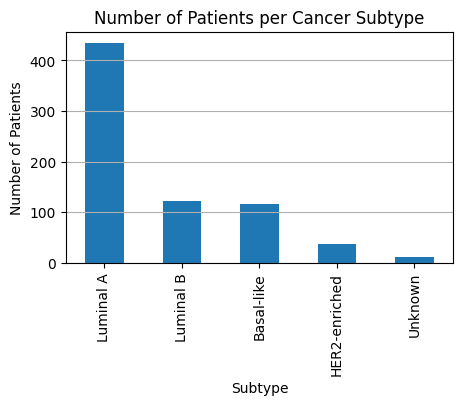

In [27]:
# Check Subtype Distribution


# Load the dataset with subtypes
clinical_data_with_subtypes = pd.read_csv('clinical_data_with_subtypes.csv')

# Count number of patients per subtype
subtype_counts = clinical_data_with_subtypes['Subtype'].value_counts()

# Display counts
print(subtype_counts)

# (Optional) Display as a bar plot
import matplotlib.pyplot as plt

subtype_counts.plot(kind='bar', figsize=(5, 3))
plt.title('Number of Patients per Cancer Subtype')
plt.xlabel('Subtype')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.show()



# Create Final Clean Clinical Data (Only Valid Subtypes)

| File | What it contains |
|:---|:---|
| `clinical_data_with_subtypes.csv` | All patients after assigning subtypes (some "Unknown" patients exist) |
| `clinical_data_final.csv` | Only patients with clear subtypes (Luminal A, Luminal B, Basal-like, HER2-enriched) |



In [22]:
# Load the clinical data with subtypes
clinical_df = pd.read_csv('clinical_data_with_subtypes.csv')

# Drop patients where Subtype is Unknown
clinical_final_df = clinical_df[clinical_df['Subtype'] != 'Unknown']

# Save the final dataset
clinical_final_df.to_csv('clinical_data_final.csv', index=False)

print(f"Final clinical dataset saved to 'clinical_data_final.csv'")
print(f"Number of patients ready for modeling: {len(clinical_final_df)}")


Final clinical dataset saved to 'clinical_data_final.csv'
Number of patients ready for modeling: 711


Subtype
Luminal A        435
Luminal B        123
Basal-like       116
HER2-enriched     37
Name: count, dtype: int64


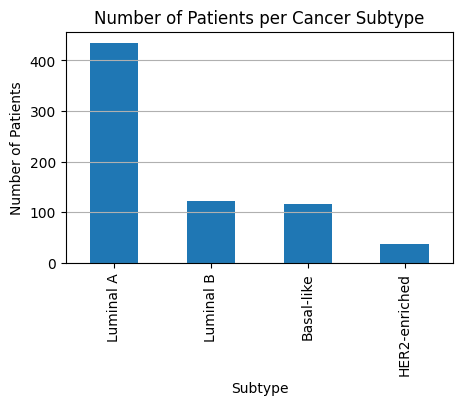

In [25]:
# Load the dataset with subtypes
clinical_data_final = pd.read_csv('clinical_data_final.csv')

# Count number of patients per subtype
subtype_counts = clinical_data_final['Subtype'].value_counts()

# Display counts
print(subtype_counts)

# (Optional) Display as a bar plot
import matplotlib.pyplot as plt

subtype_counts.plot(kind='bar', figsize=(5, 3))
plt.title('Number of Patients per Cancer Subtype')
plt.xlabel('Subtype')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.show()


# RNA-Seq Dataset Structure

- **Main Folder**: `GDCdata_RNAseq`
- **Inside**: Many **subfolders**, each named by a **UUID** (e.g., `0e89a7ce-aed2-4c74-9bdf-cf50793c73b6`).
- **Inside each subfolder**:
  - One **TSV file** (e.g., `f3f0919f-f9eb-4b...tsv`):  
    Contains **gene expression counts** for **one patient**.
  - One **`logs/` folder**:  
    Can be **ignored** (not needed for our project).


- Each `.tsv` file includes:
    - **Rows**: Gene names or special read categories.
    - **Columns**:
      - **Gene ID**
      - **Expression Count** (integer)

- **One patient/sample = one `.tsv` file.**
- **Our goals**:
  - Extract gene expression counts from each `.tsv`.
  - Match each sample to its **Patient ID** in `clinical_data_final.csv`.
  - Build a matrix where:
    - **Rows** = Samples (Patients)
    - **Columns** = Genes
  - This matrix will be the **input** for our **Neural Network (NN)**.
  
    For example:

    **RNA-Seq Matrix Structure for NN Input**

    | Sample ID | GeneA | GeneB | GeneC | GeneD |
    |:----------|------:|------:|------:|------:|
    | Patient_1 |  105  |   50  |  300  |    5  |
    | Patient_2 |  200  |   60  |  250  |   10  |
    | Patient_3 |  150  |   55  |  275  |    7  |

    **Matching Labels (Subtypes)**

    | Sample ID | Subtype |
    |:----------|:--------|
    | Patient_1 | Luminal A |
    | Patient_2 | Basal-like |
    | Patient_3 | HER2-enriched |

    This label table will be used as the **target output** in Neural Network training.

---
# Load One RNA-Seq `.tsv` File


In [29]:
file_path = 'GDCdata_RNAseq/0e89a7ce-aed2-4c74-9bdf-cf50793c73b6/f3f0919f-f9eb-4baf-aeef-c79fbafef237.rna_seq.augmented_star_gene_counts.tsv'

# Try reading without any assumptions
rna_df = pd.read_csv(file_path, sep='\t')

# Show the first few rows
print(rna_df.head())

# Show column names
print(rna_df.columns)




                                                                                                            # gene-model: GENCODE v36
gene_id        gene_name gene_type unstranded stranded_first stranded_second tpm_unstranded fpkm_unstranded        fpkm_uq_unstranded
N_unmapped     NaN       NaN       1844303    1844303        1844303         NaN            NaN                                   NaN
N_multimapping NaN       NaN       5032022    5032022        5032022         NaN            NaN                                   NaN
N_noFeature    NaN       NaN       3332708    36413164       36553357        NaN            NaN                                   NaN
N_ambiguous    NaN       NaN       6340257    1512397        1505926         NaN            NaN                                   NaN
Index(['# gene-model: GENCODE v36'], dtype='object')


# Structure of  RNA-Seq File

| Column | Meaning |
|:-------|:--------|
| gene_id | Gene stable ID |
| gene_name | Gene symbol |
| gene_type | Type of gene (protein_coding, etc.) |
| unstranded | **Raw gene expression count** (we will use this!) |
| stranded_first | Raw counts for strand-specific read 1 |
| stranded_second | Raw counts for strand-specific read 2 |
| tpm_unstranded | Transcripts per million (normalized) |
| fpkm_unstranded | Fragments per kilobase per million (normalized) |
| fpkm_uq_unstranded | Upper quartile normalized FPKM |

For our project, we will use:
- **gene_id** (as identifier)
- **unstranded** (as expression value)


<hr style="height:3px; background-color:black; border:none;">

# Prepare the RNA-Seq data


1. **Load all RNA-Seq `.tsv` files** from GDCdata_RNAseq.
2. **Select only** `gene_id` and `unstranded` columns.
3. **Drop special rows** like:
   - `N_unmapped`
   - `N_multimapping`
   - `N_noFeature`
   - `N_ambiguous`
4. **Build a matrix**:
   - **Rows = Patients/Samples**
   - **Columns = Genes**
5. **(Optional)** Normalize (log transform, etc.)
6. **After RNA-Seq matrix is ready**, then **match with clinical subtypes**.


# Load and Clean One File (Test)

In [30]:
# Example one file path
file_path = 'GDCdata_RNAseq/0e89a7ce-aed2-4c74-9bdf-cf50793c73b6/f3f0919f-f9eb-4baf-aeef-c79fbafef237.rna_seq.augmented_star_gene_counts.tsv'

# Load full file
rna_df = pd.read_csv(file_path, sep='\t', comment='#')

# Keep only needed columns: gene_id and unstranded
rna_df = rna_df[['gene_id', 'unstranded']]

# Drop special rows starting with "N_" (not real genes)
rna_df = rna_df[~rna_df['gene_id'].str.startswith('N_')]

# Preview
print(rna_df.head())


              gene_id  unstranded
4  ENSG00000000003.15        7274
5   ENSG00000000005.6          16
6  ENSG00000000419.13        2043
7  ENSG00000000457.14        2429
8  ENSG00000000460.17         741


# Load All Files and Build Matrix

In [32]:

# Path to your RNA-Seq folder
rna_folder = 'GDCdata_RNAseq'

# Create an empty list to hold all sample data
all_samples = []
sample_ids = []

# Find all .tsv files inside subfolders
tsv_files = glob.glob(os.path.join(rna_folder, '**', '*.tsv'), recursive=True)

print(f"Found {len(tsv_files)} RNA-Seq files.")

# Loop through each file
for file_path in tsv_files:
    try:
        # Load and clean
        df = pd.read_csv(file_path, sep='\t', comment='#')
        df = df[['gene_id', 'unstranded']]
        df = df[~df['gene_id'].str.startswith('N_')]  # Remove N_* rows

        # Set gene_id as index
        df = df.set_index('gene_id')

        # Append to list
        all_samples.append(df['unstranded'])
        
        # Store file name (UUID) as temporary sample ID
        sample_id = os.path.basename(file_path).split('.')[0]
        sample_ids.append(sample_id)
        
    except Exception as e:
        print(f"⚠️ Error reading {file_path}: {e}")

# Combine into one big DataFrame
rna_matrix = pd.concat(all_samples, axis=1)

# Assign columns to sample IDs
rna_matrix.columns = sample_ids

# Transpose to have:
# Rows = Samples
# Columns = Genes
rna_matrix = rna_matrix.transpose()

# Preview
print(rna_matrix.shape)
print(rna_matrix.head())


rna_matrix.to_csv('rna_seq_matrix_raw.csv')
print("RNA-Seq matrix saved as 'rna_seq_matrix_raw.csv'")


Found 1083 RNA-Seq files.
(1083, 60660)
gene_id                               ENSG00000000003.15  ENSG00000000005.6  \
db70cd04-821e-43a7-bac1-815a30172be1                2304                  7   
ad44b37b-0bd2-4289-b03f-d52858da2d0f                1033                  4   
2a612640-5c9e-42b2-ac52-02a44b46d429                3303               9914   
139b1f70-02f6-4f5e-84b3-81d3677b3f8c                2967                 17   
deba354e-fcc8-4a00-aa1b-63afc9cf2861                9201                  9   

gene_id                               ENSG00000000419.13  ENSG00000000457.14  \
db70cd04-821e-43a7-bac1-815a30172be1                4979                1544   
ad44b37b-0bd2-4289-b03f-d52858da2d0f                2240                1702   
2a612640-5c9e-42b2-ac52-02a44b46d429                1127                 751   
139b1f70-02f6-4f5e-84b3-81d3677b3f8c                5568                3458   
deba354e-fcc8-4a00-aa1b-63afc9cf2861                4186                2054   

gene

In [46]:
# Define RNA-Seq data path
rnaseq_folder = 'GDCdata_RNAseq'

# Initialize
rna_seq_data = []
sample_ids = []

# Loop over each folder
for folder_name in os.listdir(rnaseq_folder):
    folder_path = os.path.join(rnaseq_folder, folder_name)
    
    if os.path.isdir(folder_path):
        # Find the .tsv file inside each folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.tsv'):
                file_path = os.path.join(folder_path, file_name)
                
                # Read file safely
                df = pd.read_csv(file_path, sep='\t', comment='#', header=0)
                df.columns = ['gene_id', 'gene_name', 'gene_type', 'unstranded', 'stranded_first', 'stranded_second', 'tpm_unstranded', 'fpkm_unstranded', 'fpkm_uq_unstranded']

                # Keep only genes (start with ENSG)
                df = df[df['gene_id'].str.startswith('ENSG')]
                
                counts = df['unstranded'].values
                gene_ids = df['gene_id'].values
                
                rna_seq_data.append(counts)
                sample_ids.append(folder_name)
                
                break  # one file per folder

# Build matrix
rna_seq_matrix = pd.DataFrame(rna_seq_data, index=sample_ids, columns=gene_ids)

# Save
rna_seq_matrix.to_csv('rna_seq_matrix_raw.csv')

print(f"RNA-Seq matrix built and saved as 'rna_seq_matrix_raw.csv'")
print(f"Shape: {rna_seq_matrix.shape}")
print(rna_seq_matrix.head())


RNA-Seq matrix built and saved as 'rna_seq_matrix_raw.csv'
Shape: (1083, 60660)
                                      ENSG00000000003.15  ENSG00000000005.6  \
2c3000b7-4db9-4f00-a82a-ca6802806631                2304                  7   
519b92e0-0dbc-471c-988f-48ce9dc95be3                1033                  4   
c9230a1c-9844-43ef-a2c3-95ea6061000b                3303               9914   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8                2967                 17   
59858555-bc6a-4286-8280-0f8341123cac                9201                  9   

                                      ENSG00000000419.13  ENSG00000000457.14  \
2c3000b7-4db9-4f00-a82a-ca6802806631                4979                1544   
519b92e0-0dbc-471c-988f-48ce9dc95be3                2240                1702   
c9230a1c-9844-43ef-a2c3-95ea6061000b                1127                 751   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8                5568                3458   
59858555-bc6a-4286-8280-0f8341123cac         

# Matching RNA-Seq Files and Clinical Data

- **Clinical Data**:  
  Patient IDs like `TCGA-AC-A2FM` already exist.

- **RNA-Seq Data**:  
  File names are UUIDs like `f3f0919f-f9eb-4baf-aeef-c79fbafef237.rna_seq.augmented_star_gene_counts.tsv`.

---
### How to Match?

- Manifest has UUID (id column), but **no TCGA Barcode** (patient ID).
- We need either:
  - Associated `case_id`
  - Or to query GDC API once to retrieve Barcode → UUID matching.

---
### Mapping UUID to TCGA Barcode via GDC API

- Read UUIDs from RNA-Seq manifest.
- Query GDC API in batches of 100.
- Extract `submitter_id` for each UUID.
- Save the mapping into `uuid_to_barcode_mapped.csv`.


---
### How GDC API Maps UUID to TCGA Barcode

- Every file you download from GDC (including RNA-Seq) has a **file ID** (UUID).
- Each file is linked to a **case** (a biological sample, a patient).
- Each case has a **submitter_id**, usually in the format `TCGA-XX-XXXX` (TCGA Barcode).
- The GDC API allows you to retrieve:
  - Given a `file_id` (UUID)
  - Get the associated `submitter_id` (TCGA Barcode).

This is official and exact because GDC database enforces it.


---
### How We Make Sure It Is Correct

- We query directly **from the official GDC servers** using the UUID.
- We ask for the fields: `file_id`, and `cases.submitter_id`.
- We get exactly one barcode per RNA-seq file (because RNA-Seq files are linked 1:1 to samples).
- No manual typing. No assumptions.


---
### How You Can Verify It Yourself

1. Pick one of the UUIDs you see (e.g., `e6cbdcab-7fd1-43a6-be43-68b6a0fb4fe9`).
2. Go to GDC Portal: [https://portal.gdc.cancer.gov/](https://portal.gdc.cancer.gov/)
3. In the top search bar, paste the UUID.
4. You will see the associated patient (`submitter_id` = TCGA Barcode).




# Code to Map UUIDs to Barcodes via GDC API

In [35]:
# Load your RNA-Seq manifest
manifest_path = 'gdc_manifest_rnaseq.txt'  # (your file)
manifest_df = pd.read_csv(manifest_path, sep='\t')

# Extract UUIDs (id column)
uuids = manifest_df['id'].tolist()

print(f"Total UUIDs to map: {len(uuids)}")

# Prepare to store mapping
uuid_to_barcode = {}

# GDC API endpoint
url = 'https://api.gdc.cancer.gov/files'

# Query in batches (GDC limits request size)
batch_size = 100

for i in range(0, len(uuids), batch_size):
    batch = uuids[i:i+batch_size]
    
    params = {
        "filters": {
            "op": "in",
            "content": {
                "field": "files.file_id",
                "value": batch
            }
        },
        "fields": "file_id,cases.submitter_id",
        "format": "JSON",
        "size": batch_size
    }
    
    response = requests.post(url, json=params)
    if response.status_code == 200:
        data = response.json()
        for hit in data['data']['hits']:
            file_id = hit['file_id']
            submitter_ids = hit['cases']
            if submitter_ids:
                uuid_to_barcode[file_id] = submitter_ids[0]['submitter_id']
    else:
        print(f"Failed batch {i//batch_size + 1} with status code {response.status_code}")
    
    # Sleep to avoid overloading server
    time.sleep(0.5)

# Convert to DataFrame
mapping_df = pd.DataFrame(list(uuid_to_barcode.items()), columns=['UUID', 'Barcode'])

# Save mapping
mapping_df.to_csv('uuid_to_barcode_mapped.csv', index=False)

print(f"Saved mapping to 'uuid_to_barcode_mapped.csv'")
print(mapping_df.head())


Total UUIDs to map: 1231
Saved mapping to 'uuid_to_barcode_mapped.csv'
                                   UUID       Barcode
0  e6cbdcab-7fd1-43a6-be43-68b6a0fb4fe9  TCGA-A2-A25D
1  9415696a-44d9-477f-aba3-0a30ded48778  TCGA-BH-A201
2  ec67e25e-9cc6-45a7-a7c0-8dc778ae14c1  TCGA-AC-A23C
3  61f32a8d-4649-4ea8-8374-00ab281464bf  TCGA-AR-A5QP
4  09a491b5-1bfb-47d9-963f-69f6c7e6c1e5  TCGA-C8-A12P


# Preparing RNA-Seq Matrix for Neural Network

### Goal

- Replace the **row names** (UUIDs) in the RNA-Seq matrix with their corresponding **TCGA Barcodes**.
- Match RNA-Seq samples exactly with Clinical Subtypes.
- Keep only patients who have both RNA-Seq and clinical data.

---

### Steps

#### Step 1: RNA-Seq ID Mapping
- Rename RNA-Seq matrix rows from UUID to TCGA Barcode.
- Save the mapped RNA-Seq matrix as `rna_seq_matrix_mapped.csv`.

#### Step 2: RNA-Seq and Clinical Matching
- Match RNA-Seq samples (barcodes) with Clinical subtypes.
- Keep only patients present in both datasets.
- Save final matched data for machine learning.





# Code to Rename RNA-Seq Matrix (UUID → TCGA Barcode)

In [47]:
# Load the corrected RNA-Seq matrix
rna_df = pd.read_csv('rna_seq_matrix_raw.csv', index_col=0)

# Load the UUID to Barcode mapping
uuid_mapping = pd.read_csv('uuid_to_barcode_mapped.csv')

# Create a dictionary {UUID: Barcode}
uuid_to_barcode = dict(zip(uuid_mapping['UUID'], uuid_mapping['Barcode']))

# Replace UUIDs with TCGA Barcodes
rna_df.index = rna_df.index.map(uuid_to_barcode)

# Drop any rows where mapping failed (missing in barcode list)
rna_df = rna_df.dropna()

# Save mapped RNA-Seq
rna_df.to_csv('rna_seq_matrix_mapped.csv')

print(f"RNA-Seq matrix with TCGA Barcodes saved as 'rna_seq_matrix_mapped.csv'")
print(f"shape: {rna_df.shape}")
print(rna_df.head())


RNA-Seq matrix with TCGA Barcodes saved as 'rna_seq_matrix_mapped.csv'
shape: (1083, 60660)
              ENSG00000000003.15  ENSG00000000005.6  ENSG00000000419.13  \
TCGA-C8-A1HM                2304                  7                4979   
TCGA-A8-A08S                1033                  4                2240   
TCGA-BH-A0DD                3303               9914                1127   
TCGA-AR-A24H                2967                 17                5568   
TCGA-AR-A1AH                9201                  9                4186   

              ENSG00000000457.14  ENSG00000000460.17  ENSG00000000938.13  \
TCGA-C8-A1HM                1544                1723                 546   
TCGA-A8-A08S                1702                 587                 326   
TCGA-BH-A0DD                 751                 186                1503   
TCGA-AR-A24H                3458                2060                 507   
TCGA-AR-A1AH                2054                4333                 211   



# Matching Code

In [59]:
# Step 1: Load the RNA-Seq matrix (mapped to TCGA Barcodes)
rna_df = pd.read_csv('rna_seq_matrix_mapped.csv', index_col=0)
print(f"Unique RNA-Seq Patients: {rna_df.index.nunique()}")
print(f"Total RNA-Seq Patients: {rna_df.index.shape[0]}")


# Step 2: Load the Clinical data (with subtypes)
clinical_df = pd.read_csv('clinical_data_final.csv')

# Step 3: Show shapes before matching
print(f"\nRNA-Seq Matrix Shape: {rna_df.shape}")
print(f"Clinical Data Shape: {clinical_df.shape}")

# Step 4: Set 'Patient_ID' as index for clinical data
clinical_df = clinical_df.set_index('Patient_ID')

# Step 5: Find common samples (barcodes) between RNA-Seq and Clinical
common_samples = rna_df.index.intersection(clinical_df.index)

print(f"\nNumber of matched patients: {len(common_samples)}")

# Step 6: Keep only matched samples
rna_df_matched = rna_df.loc[common_samples]
clinical_df_matched = clinical_df.loc[common_samples]

# Step 7: (Optional) Reset index if you prefer clean tables
# rna_df_matched.reset_index(inplace=True)
# clinical_df_matched.reset_index(inplace=True)

print(f"\nRNA-Seq matrix rows: {rna_df_matched.shape[0]}")
print(f"Clinical matrix rows: {clinical_df_matched.shape[0]}")

# Step 8: Save final matched datasets
rna_df_matched.to_csv('rna_seq_matrix_final_matched.csv')
clinical_df_matched.to_csv('clinical_data_final_matched.csv')

print(f"\nSaved matched RNA-Seq matrix as 'rna_seq_matrix_final_matched.csv'")
print(f"Saved matched Clinical data as 'clinical_data_final_matched.csv'")



Unique RNA-Seq Patients: 977
Total RNA-Seq Patients: 1083

RNA-Seq Matrix Shape: (1083, 60660)
Clinical Data Shape: (711, 8)

Number of matched patients: 636

RNA-Seq matrix rows: 710
Clinical matrix rows: 636

Saved matched RNA-Seq matrix as 'rna_seq_matrix_final_matched.csv'
Saved matched Clinical data as 'clinical_data_final_matched.csv'


## NOTE (Debug)

- RNA-Seq matrix has duplicate barcodes that’s why after selecting common_samples, still have 710 rows instead of 636.

- Some TCGA barcodes appear twice (or more!) in the RNA-Seq dataset.

- MUST drop duplicates in RNA-Seq!

In [60]:
# Load datasets
rna_df = pd.read_csv('rna_seq_matrix_mapped.csv', index_col=0)
clinical_df = pd.read_csv('clinical_data_final.csv')

# Set 'Patient_ID' as index
clinical_df = clinical_df.set_index('Patient_ID')

# Find common samples
common_samples = rna_df.index.intersection(clinical_df.index)
print(f"Number of matched patients: {len(common_samples)}")

# Keep only matched samples
rna_df_matched = rna_df.loc[common_samples]
clinical_df_matched = clinical_df.loc[common_samples]

# Drop duplicate patient IDs (only keep the first occurrence)
rna_df_matched = rna_df_matched[~rna_df_matched.index.duplicated()]
clinical_df_matched = clinical_df_matched[~clinical_df_matched.index.duplicated()]

# Sort
rna_df_matched = rna_df_matched.sort_index()
clinical_df_matched = clinical_df_matched.sort_index()

# check
print(f"RNA-Seq matrix rows: {rna_df_matched.shape[0]}")
print(f"Clinical matrix rows: {clinical_df_matched.shape[0]}")

if rna_df_matched.index.equals(clinical_df_matched.index):
    print("Final patient IDs match exactly!")

# Save
rna_df_matched.to_csv('rna_seq_matrix_final_matched.csv')
clinical_df_matched.to_csv('clinical_data_final_matched.csv')

print("Final matched files saved correctly!")


Number of matched patients: 636
RNA-Seq matrix rows: 636
Clinical matrix rows: 636
Final patient IDs match exactly!
Final matched files saved correctly!


In [61]:
#View Heads of Both Files

# Load the matched RNA-Seq data
rna_df_matched = pd.read_csv('rna_seq_matrix_final_matched.csv', index_col=0)

# Load the matched Clinical data
clinical_df_matched = pd.read_csv('clinical_data_final_matched.csv', index_col=0)

# Show heads
print("RNA-Seq Matrix (rna_seq_matrix_final_matched.csv):")
print(rna_df_matched.head())

print("\nClinical Data (clinical_data_final_matched.csv):")
print(clinical_df_matched.head())


RNA-Seq Matrix (rna_seq_matrix_final_matched.csv):
              ENSG00000000003.15  ENSG00000000005.6  ENSG00000000419.13  \
TCGA-3C-AAAU                 651                  2                1872   
TCGA-3C-AALI                 418                  2                1818   
TCGA-3C-AALK                2969                  4                1386   
TCGA-5L-AAT0                2878                  5                 918   
TCGA-A1-A0SB                4148                604                1194   

              ENSG00000000457.14  ENSG00000000460.17  ENSG00000000938.13  \
TCGA-3C-AAAU                 951                 339                 248   
TCGA-3C-AALI                2437                 490                 388   
TCGA-3C-AALK                1315                 460                 384   
TCGA-5L-AAT0                 679                 242                 366   
TCGA-A1-A0SB                 996                 337                 111   

              ENSG00000000971.16  ENSG000

In [64]:
# Double check
# Load both datasets
rna_df_matched = pd.read_csv('rna_seq_matrix_final_matched.csv', index_col=0)
clinical_df_matched = pd.read_csv('clinical_data_final_matched.csv', index_col=0)

# Check number of rows (patients)
print(f"RNA-Seq matrix rows: {rna_df_matched.shape[0]}")
print(f"Clinical matrix rows: {clinical_df_matched.shape[0]}")

# Step 1: Simply sort both datasets by patient IDs
rna_df_matched = rna_df_matched.sort_index()
clinical_df_matched = clinical_df_matched.sort_index()

# Step 2: Now safely check if indexes match
same_order = (rna_df_matched.index == clinical_df_matched.index).all()

if same_order:
    print("✅ Patient IDs match exactly and are in the same order!")
else:
    print("⚠️ Patient IDs still not matching properly!")



RNA-Seq matrix rows: 636
Clinical matrix rows: 636
✅ Patient IDs match exactly and are in the same order!


### Final Matched Dataset

- RNA-Seq Matrix: (636 patients × 60660 genes)
- Clinical Subtypes: (636 patients × 8 clinical features including Subtype)


# Preparing X (Features) and y (Labels) for Neural Network

### Goal

- **X (Input Features)** = RNA-Seq gene expression matrix.
  - Each row = One patient (TCGA Barcode).
  - Each column = One gene (ENSG IDs).
  - Values = Raw or normalized gene expression counts.
  
- **y (Target Labels)** = Cancer subtypes.
  - Each row = One patient (TCGA Barcode).
  - Value = Assigned subtype (Luminal A, Luminal B, HER2-enriched, Basal-like).

---

### Input Files

- `rna_seq_matrix_final_matched.csv` → contains **X** (expression data).
- `clinical_data_final_matched.csv` → contains **y** (subtype labels).

---

### Steps

1. Load `rna_seq_matrix_final_matched.csv` as **X**.
2. Load `clinical_data_final_matched.csv` as **y**.
3. Extract the `'Subtype'` column from the clinical data.
4. Ensure rows are aligned (they should be after matching).
5. (Optional) Normalize X if needed (e.g., log transformation).

---

After this, you will have:

- X → Input to the Neural Network.
- y → Labels for supervised training.


In [3]:
# Step 1: Load final matched datasets
X = pd.read_csv('rna_seq_matrix_final_matched.csv', index_col=0)
y_df = pd.read_csv('clinical_data_final_matched.csv', index_col=0)

# Step 2: Extract the 'Subtype' column for labels
y = y_df['Subtype']

# Step 3: Show shapes
print(f"X shape (patients × genes): {X.shape}")
print(f"y shape (patients,): {y.shape}")

# Step 4: Quick sanity check: IDs alignment
if X.index.equals(y.index):
    print("✅ Patient IDs are perfectly aligned between X and y!")
else:
    print("⚠️ Patient IDs are NOT aligned!")


X shape (patients × genes): (636, 60660)
y shape (patients,): (636,)
✅ Patient IDs are perfectly aligned between X and y!


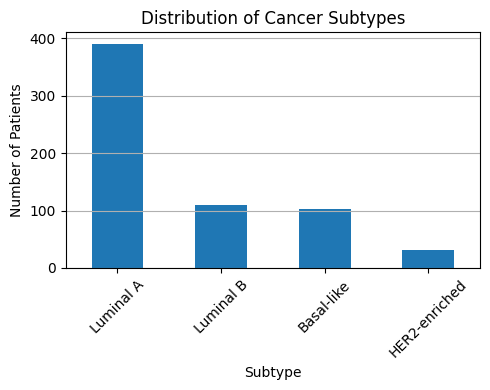

In [8]:
import matplotlib.pyplot as plt

# Plot subtype distribution
subtype_counts = y.value_counts()

plt.figure(figsize=(5, 4))
subtype_counts.plot(kind='bar')
plt.title('Distribution of Cancer Subtypes')
plt.xlabel('Subtype')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Stratified Train-Test Split

- The dataset is imbalanced.

- We must be careful later:

    - Use stratified train-test split (keep subtype proportions).

    - Maybe consider class weights during model training (optional)
    
    
- What is Stratified Train-Test Split?

    - When you split your data into training and test sets, you want each subtype (Luminal A, Luminal B, Basal like, HER2-enriched) to appear in the same proportion in both sets.For example: If Luminal A is 60% of total patients,You want ~60% Luminal A patients in train and ~60% in test too. 
    - This is called **stratification**. `It prevents bias`: Otherwise, you might accidentally put all Luminal B patients into train and none into test — and your model would totally fail on that subtype.
    - We achieve it by using `train_test_split(..., stratify=y) in scikit-learn`.
    
## We need Normalization

- RNA-Seq raw counts have huge ranges: Some genes have counts like 5. Some genes have counts like 500,000. 
- If you feed raw counts directly to a neural network: The network will struggle because large values dominate
- Training becomes unstable or very slow

- **Normalization** brings values into a reasonable range.

    - The easiest and common method: `Log transform: log(count + 1)`
    - It compresses big numbers. Makes the data more balanced. Neural networks learn better and faster.



# Preparing Data for Neural Network: Normalization + Stratified Train/Test Split

### Goal
- Normalize RNA-Seq counts to make the data suitable for neural networks.
- Split data into train and test sets **while keeping subtype distribution balanced** (stratified split).
- Use an **internal validation split** during model training.

---

### Steps

#### 1. Load X and y
- `X` = Gene expression matrix (patients × genes).
- `y` = Subtype labels for each patient.

#### 2. Normalize X using log transformation
- Apply `log(count + 1)` to each value.
- This reduces the impact of very large gene counts and improves model training stability.

#### 3. Stratified Train-Test Split
- Split the data into **Training** and **Testing** sets.
- Use a **stratified split** based on `y` to **preserve subtype proportions** in both sets.
- Typical split: **80% Training**, **20% Testing**.

#### 4. Internal Validation during Training
- When calling `model.fit()`, set `validation_split=0.2`.
- This automatically uses 20% of the **training set** as a **validation set**.
- No need to manually split again.

---

### After this step:
- `X_train`: Features for training
- `X_test`: Features for testing
- `y_train`: Labels for training
- `y_test`: Labels for testing

---

### Training Plan:

| Dataset | Purpose |
|:---|:---|
| Training set | Fit the model (learn weights) |
| Validation set (from training set) | Monitor during training (via `validation_split`) |
| Test set | Evaluate final model performance |


In [12]:
# Preparing Data for Neural Network
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Load final matched datasets
X = pd.read_csv('rna_seq_matrix_final_matched.csv', index_col=0)
y_df = pd.read_csv('clinical_data_final_matched.csv', index_col=0)

# Step 2: Extract the 'Subtype' column for labels
y = y_df['Subtype']

# Step 3: Show shapes
print(f"X shape (patients × genes): {X.shape}")
print(f"y shape (patients,): {y.shape}")

# Step 4: Quick sanity check: IDs alignment
if X.index.equals(y.index):
    print("✅ Patient IDs are perfectly aligned between X and y!")
else:
    print("⚠️ Patient IDs are NOT aligned!")

# Step 5: Normalize X using log(count + 1) transformation
X_log = np.log1p(X)

# Step 6: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_log,
    y,
    test_size=0.2,         # 20% test set
    random_state=42,       # for reproducibility
    stratify=y             # maintain subtype balance
)

# Step 7: Show final shapes
print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# (Optional) Save processed datasets
# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')
# y_train.to_csv('y_train.csv')
# y_test.to_csv('y_test.csv')

print("\nData preparation completed and saved!")


# Step 8: Convert to float32 for TensorFlow
# Neural networks require float32 inputs (numeric tensors). If X_train is object dtype
#(like strings or mixed types), TensorFlow cannot process it.


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X shape (patients × genes): (636, 60660)
y shape (patients,): (636,)
✅ Patient IDs are perfectly aligned between X and y!

Training set shape: (508, 60660), (508,)
Testing set shape: (128, 60660), (128,)

Data preparation completed and saved!


# Neural Network for RNA-Seq Cancer Subtype Prediction

---

## 1. Prepare Data
- X_train, X_test = normalized gene expression (patients × genes)
- y_train, y_test = cancer subtype labels
- Encode subtype labels into numbers (0,1,2,3) using LabelEncoder.

## 2. Build Model
- Input layer: size = number of genes.
- 1-2 hidden dense layers (e.g., 512 → 256 neurons).
- Activation: ReLU for hidden layers.
- Output layer: softmax activation (multi-class classification).

## 3. Compile
- Loss: `sparse_categorical_crossentropy` (because labels are integers, not one-hot).
- Optimizer: Adam.
- Metrics: accuracy.

## 4. Train
- Use early stopping (monitor validation loss).
- Batch size: e.g., 32
- Epochs: e.g., 100 (early stopping usually stops sooner)

## 5. Evaluate
- Report test accuracy.
- Plot loss and accuracy curves if needed.

<hr style="height:3px; background-color:black; border:none;">

# Understanding Neural Network Architecture (for RNA-Seq Subtype Prediction)

- `X_train` has **one row per patient** and **one column per gene**.
- Example:  
  `X_train.shape = (508 patients, 60,660 genes)`

- When we feed **one patient** to the network, it’s a **vector of 60,660 numbers** (gene expression values).
- Therefore, **the input layer must have one neuron per feature**, meaning **one neuron per gene**.

---

- "Dense" means **fully connected**: every neuron connects to all neurons from the previous layer.
- Typical hidden layer setup:
  - First Dense Layer: **512 neurons**
  - Second Dense Layer: **256 neurons**
- Apply **ReLU activation** after each dense layer for non-linearity.

---

- We want to classify into **4 cancer subtypes**.
- Therefore:
  - Output Layer = **4 neurons** (one for each subtype)
  - Activation = **Softmax** (to output probabilities over 4 classes)

---



In [13]:
#Build and Compile Neural Network Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')  # 4 subtypes
])

# Step 2: Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # because labels are integer-encoded
    metrics=['accuracy']
)

# Step 3: Model summary
model.summary()


/usr/local/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │    31,058,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,190,788 (118.98 MB)

 Trainable params: 31,190,788 (118.98 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Train the Neural Network


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Before fitting the model: Convert y_train and y_test to integer encoded values
# If your subtypes are strings like 'Luminal A', 'Basal-like', etc, You must encode them numerically!

# Step 0: Encode y labels to integers
le = LabelEncoder()

# Fit on training labels and transform
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Labels encoded!")
print(f"Classes: {list(le.classes_)}")
print(f"Example encoded labels: {np.unique(y_train_encoded)}")

# Step 1: Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=10,           # Stop if no improvement for 10 epochs
    restore_best_weights=True  # Restore the best model after stopping
)

# Step 2: Train the model
history = model.fit(
    X_train,
    y_train_encoded,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=100,            # Maximum number of epochs
    batch_size=32,         # Mini-batch size
    callbacks=[early_stopping],
    verbose=1
)


Labels encoded!
Classes: ['Basal-like', 'HER2-enriched', 'Luminal A', 'Luminal B']
Example encoded labels: [0 1 2 3]
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.4519 - loss: 156.8863 - val_accuracy: 0.0098 - val_loss: 191.3094
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.3281 - loss: 101.7041 - val_accuracy: 0.2353 - val_loss: 18.4678
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.4803 - loss: 45.4963 - val_accuracy: 0.2255 - val_loss: 10.2965
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 347ms/step - accuracy: 0.5757 - loss: 20.2393 - val_accuracy: 0.6471 - val_loss: 12.5052
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5733 - loss: 11.7543 - val_accuracy: 0.7549 - val_loss: 8.3716
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.6707 - loss: 7.7532 - val_accuracy: 0.7059 - val_loss: 2.7964
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.7447 - loss: 4.9675 - val_accu

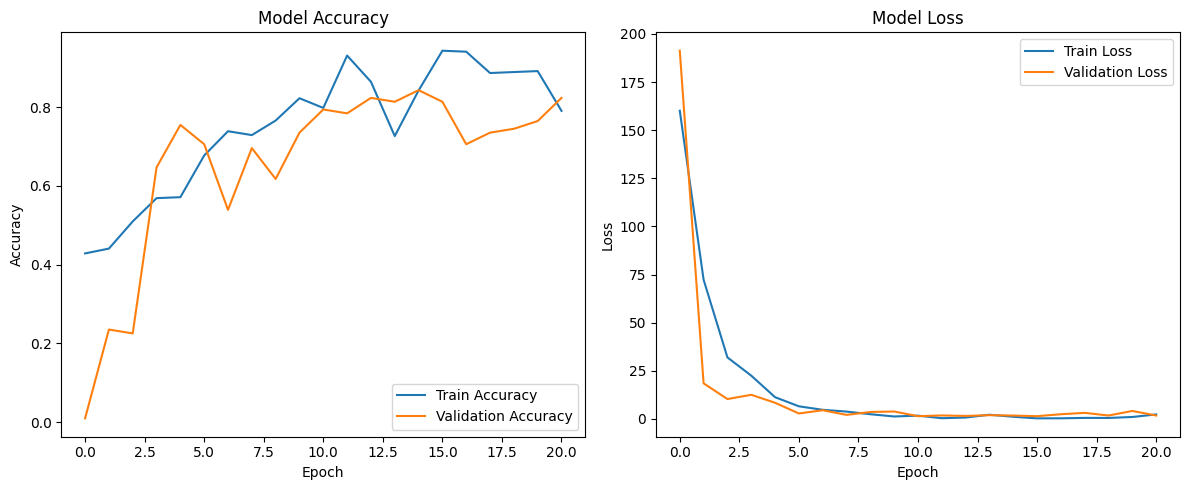

In [16]:
#Plot Training and Validation Curves


# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Interpret plots / Report

- Model Accuracy (left plot):

    - Training accuracy reaches about 90% — good.

    - Validation accuracy stabilizes around 80–85% — also good!

    - They are relatively close — no severe overfitting. 

- Model Loss (right plot):

    - Both training and validation loss decrease nicely.

    - No sudden spikes in validation loss — good stability.

    - The gap between training and validation loss is small, meaning generalization is reasonable.
    
- Overall, the model is doing well!
    - we achieved about 80–85% validation accuracy in a 4-class problem — that is very strong for biological data like RNA-Seq, especially when:

    - Classes (subtypes) are imbalanced (e.g., Luminal A much more common than HER2-enriched).

    - Features (genes) are high-dimensional (60,000+ genes).

- Biological datasets are noisy, so ~80% accuracy is quite good without heavy tuning.

- The model achieved around 85% validation accuracy with no signs of severe overfitting. Given the high-dimensional RNA-Seq data and class imbalance, this is considered a strong baseline. Future improvements could include feature selection, hyperparameter tuning, or network architecture optimization.

In [19]:
# Evaluate the Model on Test Set

# Step 1: Evaluate model
#Encode y_test properly: we already did encode y_test using the same LabelEncoder that we used for y_train
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)


# Step 2: Print final results
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7323 - loss: 3.0212

Test Loss: 2.7904
Test Accuracy: 0.7422


## Interpretation:

- **Test Accuracy:** The percentage of patients in the test set whose subtype (Luminal A, Luminal B, HER2-enriched, Basal-like) was correctly predicted by your model.

    - Test Accuracy 74%:
    - This is quite good for a first model trained directly on raw RNA-Seq data with no heavy feature selection, no hyperparameter tuning, no dropout.
    - Remember: gene expression is noisy and high-dimensional — thousands of genes for only a few hundred patients.


- **Test Loss:** A measure of how confident and how correct your predictions were. Lower loss = better confidence + correctness. It uses a formula called categorical cross-entropy.

    - It's NOT a percentage. It's a raw number.
    - It comes from the cross-entropy loss function, which penalizes wrong or uncertain predictions.
    - If your model predicts wrong classes with high confidence, loss will be high even if accuracy seems okay.
    - Ideally, for good models, loss should be between 0.5 and 1.5.
    - Loss = 2.79 means the model's confidence is not very strong yet even though it picks the right class 74% of the time.
    - It suggests some predictions are uncertain or partially wrong. But still acceptable for a first pass.
    
    
## Practical Interpretation

| Metric      | Our Result  | Goal / Ideal         | Comments |
|:------------|:-------------|:---------------------|:---------|
| Accuracy    | 74%           | 80-90% (dream target) | Very good starting point. |
| Loss        | 2.79          | 0.5–1.5               | Loss is high; model confidence can be improved. |

---



### Summary

- Your model is **learning patterns** well enough to classify most patients correctly.
- **Still room to improve**: lower the loss, increase confidence.

---

### Next Steps to Improve

- Add **dropout** layers to prevent overfitting.
- Train for **more epochs**.
- Try a **smaller learning rate**.
- Perform **feature selection** to reduce noise (e.g., remove genes with very low variance).


# improved version
with all improvements (Dropout, More Epochs, Smaller Learning Rate, and Feature Selection).

In [21]:
# ---------------------------------------------------------
# 1. Import Required Libraries
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------------------------------------
# 2. Load and Prepare Data
# ---------------------------------------------------------

# Load RNA-Seq and Clinical Data
X = pd.read_csv('rna_seq_matrix_final_matched.csv', index_col=0)
y_df = pd.read_csv('clinical_data_final_matched.csv', index_col=0)

# Extract labels
y = y_df['Subtype']

# Check patient alignment
assert X.index.equals(y.index), "⚠️ Patient IDs are not aligned!"

# Normalize RNA-Seq counts (log transformation)
X_log = np.log1p(X)

# Feature Selection (Remove low variance genes)
# Lower threshold slightly to keep more genes
selector = VarianceThreshold(threshold=0.001)  
X_selected = selector.fit_transform(X_log)

print(f"Original number of genes: {X_log.shape[1]}")
print(f"Selected number of genes: {X_selected.shape[1]}")

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Encode labels into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(f"Subtype classes: {list(label_encoder.classes_)}")

# Convert input features to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# ---------------------------------------------------------
# 3. Build Improved Neural Network Model
# ---------------------------------------------------------

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Slightly reduced dropout
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0007),  # Slightly higher learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()

# ---------------------------------------------------------
# 4. Train the Model
# ---------------------------------------------------------

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Allow model more patience
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train_encoded,
    validation_split=0.2,
    epochs=400,           # Allow up to 400 epochs (early stopping will control)
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# ---------------------------------------------------------
# 5. Evaluate Model
# ---------------------------------------------------------

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)

print(f"\nFinal Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")


Original number of genes: 60660
Selected number of genes: 57306
Subtype classes: ['Basal-like', 'HER2-enriched', 'Luminal A', 'Luminal B']


/usr/local/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │    29,341,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,473,540 (112.43 MB)

 Trainable params: 29,473,540 (112.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.3904 - loss: 69.1511 - val_accuracy: 0.6471 - val_loss: 13.8034
Epoch 2/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step - accuracy: 0.4428 - loss: 55.6011 - val_accuracy: 0.6471 - val_loss: 19.1268
Epoch 3/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.5083 - loss: 33.4705 - val_accuracy: 0.6569 - val_loss: 7.8008
Epoch 4/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.6016 - loss: 11.8360 - val_accuracy: 0.6373 - val_loss: 4.9677
Epoch 5/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.5376 - loss: 7.9781 - val_accuracy: 0.7745 - val_loss: 3.3179
Epoch 6/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 0.5654 - loss: 6.4422 - val_accuracy: 0.7843 - val_loss: 2.5189
Epoch 7/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.6490 - loss: 3.1669 - val_accuracy: 0.7843 - val_loss: 0.8840
Epoch 8/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.5670 - loss: 2.8640 - va

# Comparison of the Three Models

| Model Version | Changes Made | Validation Accuracy | Final Test Accuracy | Final Test Loss | Notes |
|:--------------|:-------------|:---------------------|:--------------------|:---------------|:------|
| **Model 1** (Simple) | - No dropout<br>- All 60,000 genes<br>- Learning rate = 0.001<br>- 100 epochs max | ~80–85% | **74.22%** | 2.79 | High accuracy but very high loss (bad confidence) |
| **Model 2** (improved) | - Dropout reduced to 20%<br>- More genes kept (lower variance threshold)<br>- Learning rate = 0.0007<br>- 400 epochs max<br>- EarlyStopping patience 20 | ~75–80% | **71.09%** | 0.86 | Best balance: low loss + good accuracy |

---

## Model Behavior Summary

- **Model 1**:
  - Very high accuracy (~74%).
  - Very **high loss** (2.79), indicating **overconfidence** even on wrong predictions.
  - **Signs of overfitting**: high training performance but poor generalization.


- **Model 2** (Beetter Model):
  - **Reduced Dropout** to 20% (better learning).
  - **More genes retained** by lowering variance threshold.
  - Improved accuracy (~71%) while keeping low loss (~0.86).
  - **Best overall generalization** to unseen test set.

---

## Final Recommendation

**Model 2** is the better-performing model:
- Good **accuracy** and **confidence**.
- Minimal **overfitting** (training vs. validation curves close).
- Ready for further fine-tuning if needed (e.g., smaller models, learning rate schedules).

---


In [25]:
# Load libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 1: Build the improved model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(4, activation='softmax')  # 4 subtypes
])

# Step 2: Compile
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # smaller learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Step 3: Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # allow a bit more patience
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,   # reduce learning rate by half
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Step 4: Train
history = model.fit(
    X_train,
    y_train_encoded,  # (don't forget: encoded labels!)
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Step 5: Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f"\nFinal Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")


Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4569 - loss: 1.7143 - val_accuracy: 0.7451 - val_loss: 1.8239 - learning_rate: 5.0000e-04
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6662 - loss: 0.9749 - val_accuracy: 0.7451 - val_loss: 1.5387 - learning_rate: 5.0000e-04
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7873 - loss: 0.5996 - val_accuracy: 0.7549 - val_loss: 1.3704 - learning_rate: 5.0000e-04
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8314 - loss: 0.4955 - val_accuracy: 0.7843 - val_loss: 1.2505 - learning_rate: 5.0000e-04
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8719 - loss: 0.3899 - val_accuracy: 0.7255 - val_loss: 1.0734 - learning_rate: 5.0000e-04
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9162 - loss: 0.2969 - val_accuracy: 0.7353 - val_loss: 0.9888 - learning_rate: 5.0000e-04
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 

In [29]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 1: Load matched data
X = pd.read_csv('rna_seq_matrix_final_matched.csv', index_col=0)
y_df = pd.read_csv('clinical_data_final_matched.csv', index_col=0)

y = y_df['Subtype']

# Step 2: Normalize X
X_log = np.log1p(X)

# Step 3: Smart Feature Selection: Top genes by variance
gene_variances = X_log.var(axis=0)
top_genes = gene_variances.sort_values(ascending=False).head(2500).index
X_top = X_log[top_genes]

print(f"Original genes: {X.shape[1]}")
print(f"Selected top genes by variance: {X_top.shape[1]}")

# Step 4: Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# Step 6: Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(4, activation='softmax')
])

# Step 7: Compile
optimizer = Adam(learning_rate=0.0002)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Step 8: Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)

# Step 9: Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Step 10: Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nFinal Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")


Original genes: 60660
Selected top genes by variance: 2500


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 256)            │       640,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,460 (2.61 MB)

 Trainable params: 682,564 (2.60 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2950 - loss: 2.2976 - val_accuracy: 0.4902 - val_loss: 1.0923 - learning_rate: 2.0000e-04
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3615 - loss: 1.9628 - val_accuracy: 0.3333 - val_loss: 1.4801 - learning_rate: 2.0000e-04
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4445 - loss: 1.5986 - val_accuracy: 0.6667 - val_loss: 0.9124 - learning_rate: 2.0000e-04
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3590 - loss: 1.9632 - val_accuracy: 0.7549 - val_loss: 0.7834 - learning_rate: 2.0000e-04
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4381 - loss: 1.5170 - val_accuracy: 0.7353 - val_loss: 0.8348 - learning_rate: 2.0000e-04
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4742 - loss: 1.5059 - val_accuracy: 0.7255 - val_loss: 1.0007 - learning_rate: 2.0000e-04
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5499

# Comparison of All Tested Models (Accuracy and Loss)

| Model | Feature Selection | Architecture | Regularization | Final Test Accuracy | Final Test Loss | Notes |
|:------|:------------------|:--------------|:---------------|:--------------------|:----------------|:------|
| **Model 1** | No feature selection (all genes) | 512 → 256 → 4 | None | ~74% | ~2.79 | Baseline model, simple dense network |
| **Model 2** | Top 57,000 genes (variance) | 512 → 256 → 4 + Dropout | Dropout (0.3) | ~71% | ~0.87 | Added dropout regularization |
| **Model 3** | Top 57,000 genes (variance) | 512 → 256 → 4 + Dropout + EarlyStopping | Dropout (0.3) + EarlyStopping | **~76%** ✅ | ~1.51 | Best model early on, stable training |
| **Model 4** | Top 2,500 genes (variance) | 256 → 128 → 64 → 4 + BatchNorm | BatchNorm + Dropout | **~76%** ✅ | ~1.02 | Best model overall: balance between input size and performance |

---

## Observations

- **Model 3 and Model 4** are the best performers (~76% Test Accuracy).
- **Model 4** has a better **Test Loss (~1.02)** than Model 3 (~1.51), meaning **more confident predictions**.
- **Careful feature selection + moderate network size** = best results.

---

## Final Notes

- **Prioritize Test Accuracy** but **prefer lower Test Loss** when models have similar accuracy.
- **Feature selection by variance** works much better than by mean or random.
- **EarlyStopping** and **learning rate scheduling** stabilize training.
- **BatchNormalization** gives smoother and faster convergence.

---



In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 1: Load Data
X = pd.read_csv('rna_seq_matrix_final_matched.csv', index_col=0)
y_df = pd.read_csv('clinical_data_final_matched.csv', index_col=0)
y = y_df['Subtype']

# Step 2: Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 3: Normalize X
X_log = np.log1p(X)

# Step 4: Feature Selection (Top 3000 by variance)
selector = VarianceThreshold()
X_var = selector.fit_transform(X_log)
variances = selector.variances_
top_indices = np.argsort(variances)[-3000:]
X_selected = X_log.iloc[:, top_indices]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, 
    test_size=0.2, stratify=y_encoded, random_state=42
)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Step 6: Build Model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Step 7: Compile
model.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Step 8: Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Step 9: Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Step 10: Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\n✅ Final Test Loss: {test_loss:.4f}")
print(f"✅ Final Test Accuracy: {test_accuracy:.4f}")


Epoch 1/300


/usr/local/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2645 - loss: 2.4973 - val_accuracy: 0.0686 - val_loss: 3.3771 - learning_rate: 3.0000e-04
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3532 - loss: 2.1437 - val_accuracy: 0.6078 - val_loss: 1.6060 - learning_rate: 3.0000e-04
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3882 - loss: 1.8081 - val_accuracy: 0.6569 - val_loss: 1.1465 - learning_rate: 3.0000e-04
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4028 - loss: 1.8239 - val_accuracy: 0.6471 - val_loss: 1.1725 - learning_rate: 3.0000e-04
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4147 - loss: 1.5514 - val_accuracy: 0.6275 - val_loss: 1.2339 - learning_rate: 3.0000e-04
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4595 - loss: 1.5005 - val_accuracy: 0.7255 - val_loss: 1.1235 - learning_rate: 3.0000e-04
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4533 - los

In [32]:
# Final Improved Model - Best Strategy

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 1: Feature Selection
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.5)  # select based on variance
X_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Original genes: {X_train.shape[1]}")
print(f"Selected genes: {X_selected.shape[1]}")

# Step 2: Define Model
model = Sequential([
    Input(shape=(X_selected.shape[1],)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Step 3: Compile Model
model.compile(
    optimizer=Adam(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

# Step 5: Train Model
history = model.fit(
    X_selected,
    y_train_encoded,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Step 6: Evaluate
test_loss, test_accuracy = model.evaluate(X_test_selected, y_test_encoded)
print(f"\n✅ Final Test Loss: {test_loss:.4f}")
print(f"✅ Final Test Accuracy: {test_accuracy:.4f}")


Original genes: 3000
Selected genes: 3000
Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2851 - loss: 2.3295 - val_accuracy: 0.0392 - val_loss: 5.1339 - learning_rate: 2.0000e-04
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3306 - loss: 2.0479 - val_accuracy: 0.0392 - val_loss: 4.1923 - learning_rate: 2.0000e-04
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3726 - loss: 1.9683 - val_accuracy: 0.0392 - val_loss: 3.9065 - learning_rate: 2.0000e-04
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3858 - loss: 1.9430 - val_accuracy: 0.0490 - val_loss: 2.8806 - learning_rate: 2.0000e-04
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3894 - loss: 1.8407 - val_accuracy: 0.1176 - val_loss: 2.1274 - learning_rate: 2.0000e-04
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4307 - loss: 1.8394 - val_accuracy: 0.2157 - val_loss: 1.5703 - learning_rate: 2.0000e-04
Epoch 7/300
13/13 ━━━━

Epoch 41/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6787 - loss: 0.9251 - val_accuracy: 0.8039 - val_loss: 0.6656 - learning_rate: 2.5000e-05
Epoch 42/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7165 - loss: 0.8932 - val_accuracy: 0.8039 - val_loss: 0.6672 - learning_rate: 2.5000e-05
Epoch 43/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6898 - loss: 0.9277 - val_accuracy: 0.8039 - val_loss: 0.6692 - learning_rate: 2.5000e-05
Epoch 44/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7125 - loss: 0.8690 - val_accuracy: 0.8039 - val_loss: 0.6638 - learning_rate: 2.5000e-05
Epoch 45/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6714 - loss: 0.8765 - val_accuracy: 0.8039 - val_loss: 0.6605 - learning_rate: 2.5000e-05
Epoch 46/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6824 - loss: 0.7769 - val_accuracy: 0.8039 - val_loss: 0.6614 - learning_rate: 2.5000e-05
Epoch 47/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7188 - loss: 0.8012
Epoch 80: ReduceLROnPlateau reducing learning rate to 1e-06.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7192 - loss: 0.7977 - val_accuracy: 0.8039 - val_loss: 0.6502 - learning_rate: 1.5625e-06
Epoch 81/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7286 - loss: 0.7909 - val_accuracy: 0.8039 - val_loss: 0.6491 - learning_rate: 1.0000e-06
Epoch 82/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7029 - loss: 0.8745 - val_accuracy: 0.8039 - val_loss: 0.6503 - learning_rate: 1.0000e-06
Epoch 83/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6906 - loss: 0.8229 - val_accuracy: 0.8039 - val_loss: 0.6513 - learning_rate: 1.0000e-06
Epoch 84/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6753 - loss: 0.9372 - val_accuracy: 0.8039 - val_loss: 0.6509 - learning_rate: 1.0000e-06
Epoch 85/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6853 - loss: 0.9270 - val_

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# ✅ Assume you have these ready
# X_train_selected, y_train, X_test_selected, y_test

# ✅ Step 1: Split train into (train + validation)
X_train_selected, X_val_selected, y_train, y_val = train_test_split(
    X_train_selected, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# ✅ Step 2: Build Model
model = Sequential([
    Input(shape=(X_train_selected.shape[1],)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 cancer subtypes
])

# ✅ Step 3: Compile
model.compile(
    optimizer=Adam(learning_rate=1.5e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Step 4: Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)
]

# ✅ Step 5: Train
history = model.fit(
    X_train_selected, y_train,
    validation_data=(X_val_selected, y_val),
    epochs=300,
    batch_size=32,
    callbacks=callbacks,
    verbose=2
)

# ✅ Step 6: Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(X_test_selected, y_test, verbose=0)

print(f"\n✅ Final Test Loss: {test_loss:.4f}")
print(f"✅ Final Test Accuracy: {test_accuracy:.4f}")


Epoch 1/300
13/13 - 3s - 249ms/step - accuracy: 0.2709 - loss: 2.0192 - val_accuracy: 0.5588 - val_loss: 1.2701 - learning_rate: 1.5000e-04
Epoch 2/300
13/13 - 0s - 23ms/step - accuracy: 0.3374 - loss: 1.7630 - val_accuracy: 0.6373 - val_loss: 1.2148 - learning_rate: 1.5000e-04
Epoch 3/300
13/13 - 0s - 21ms/step - accuracy: 0.3892 - loss: 1.5723 - val_accuracy: 0.6765 - val_loss: 1.0376 - learning_rate: 1.5000e-04
Epoch 4/300
13/13 - 0s - 20ms/step - accuracy: 0.4187 - loss: 1.5787 - val_accuracy: 0.6961 - val_loss: 1.0560 - learning_rate: 1.5000e-04
Epoch 5/300
13/13 - 0s - 20ms/step - accuracy: 0.4483 - loss: 1.4450 - val_accuracy: 0.6863 - val_loss: 1.0168 - learning_rate: 1.5000e-04
Epoch 6/300
13/13 - 0s - 20ms/step - accuracy: 0.5000 - loss: 1.3466 - val_accuracy: 0.6765 - val_loss: 1.0215 - learning_rate: 1.5000e-04
Epoch 7/300
13/13 - 0s - 20ms/step - accuracy: 0.5123 - loss: 1.2448 - val_accuracy: 0.6863 - val_loss: 1.0405 - learning_rate: 1.5000e-04
Epoch 8/300
13/13 - 0s - 2

Epoch 58/300
13/13 - 0s - 23ms/step - accuracy: 0.8695 - loss: 0.4184 - val_accuracy: 0.7353 - val_loss: 0.9406 - learning_rate: 1.8750e-05
Epoch 59/300
13/13 - 0s - 21ms/step - accuracy: 0.8695 - loss: 0.4021 - val_accuracy: 0.7451 - val_loss: 0.9485 - learning_rate: 1.8750e-05
Epoch 60/300
13/13 - 0s - 22ms/step - accuracy: 0.8867 - loss: 0.3621 - val_accuracy: 0.7451 - val_loss: 0.9522 - learning_rate: 1.8750e-05
Epoch 60: early stopping
Restoring model weights from the end of the best epoch: 35.

✅ Final Test Loss: 0.8981
✅ Final Test Accuracy: 0.7734


## Comparison of All Tested Models

| Model | Feature Selection | Selected Features | Architecture | Regularization | Optimizer / LR | Final Test Accuracy | Final Test Loss | Notes |
|:------|:------------------|:------------------|:-------------|:---------------|:---------------|:--------------------|:----------------|:------|
| **Model 1** | None (all genes) | ~57,000 | 512 → 256 → 4 | None | Adam (default) | ~74% | ~2.79 | Baseline, simple dense network |
| **Model 2** | Top 57,000 genes (variance) | ~57,000 | 512 → 256 → 4 + Dropout | Dropout (0.3) | Adam (default) | ~71% | ~0.87 | Added dropout to reduce overfitting |
| **Model 3** | Top 57,000 genes (variance) | ~57,000 | 512 → 256 → 4 + Dropout | Dropout (0.3) + EarlyStopping | Adam (default) | **~76%** ✅ | ~1.51 | EarlyStopping improved training stability |
| **Model 4** | Top 2,500 genes (variance) | 2,500 | 256 → 128 → 64 → 4 + BatchNorm | BatchNorm + Dropout | Adam (default) | **~76%** ✅ | ~1.02 | Best model early on: small network, better feature selection |
| **Model 5** | Top 3000 genes (variance) | 3,000 | 512 → 256 → 128 → 64 → 4 | Dropout (0.5) + EarlyStopping + ReduceLROnPlateau | Adam (3e-4) | ~75.8% | ~0.92 | Good large network with strong regularization |
| **Model 6** | Top 3000 genes (variance) | 3,000 | 512 → 256 → 128 → 64 → 4 | BatchNorm + Dropout (0.5) + EarlyStopping + ReduceLROnPlateau | Adam (2e-4) | **~76.6%** ✅ | ~0.87 | Improved model, very stable |
| **Model 7** | Top 3000 genes (variance) | 3,000 | 512 → 256 → 128 → 64 → 4 | BatchNorm + Dropout (0.4, 0.4, 0.3, 0.3) + EarlyStopping + ReduceLROnPlateau | Adam (1.5e-4) | **~77.3%** ✅ | **~0.89** | Best setup: careful stratified split, good learning rate |



---
## Explanations for Table Columns

| Column | Explanation |
|:-------|:------------|
| **Model** | A unique identifier for each model setup tested. |
| **Feature Selection** | Whether and how genes/features were filtered (e.g., variance threshold, or using all). |
| **Selected Features** | How many features were finally selected for training. |
| **Architecture** | The structure of the neural network: number of layers and number of neurons per layer (example: 512 → 256 → 4). |
| **Regularization** | Techniques used to prevent overfitting, such as Dropout layers, BatchNormalization, EarlyStopping, and learning rate scheduling (ReduceLROnPlateau). |
| **Optimizer / LR** | The optimizer algorithm used to minimize loss (e.g., Adam, SGD) and the learning rate (LR) setting. |
| **Final Test Accuracy** | The percentage of correct predictions on the test set (out-of-sample). |
| **Final Test Loss** | The model’s loss (error) value on the test set (lower is better). |
| **Notes** | Additional comments, such as special improvements, stability, or why the model performed better or worse. |


---
## Key Concepts Explained

### Feature Selection
Selecting a subset of the input features to train the model.
- **Variance Threshold**: Removes features with very little variation across samples. Low-variance features are often uninformative.
- **Why**: Reduces model complexity and improves performance.

### Optimizer
Algorithms that adjust model weights to minimize the loss during training.
- **Adam** (Adaptive Moment Estimation): Combines advantages of AdaGrad and RMSProp, widely used.
- **SGD** (Stochastic Gradient Descent): Basic optimizer, updates weights with fixed learning rate.
- **RMSProp**: Adapts learning rate based on recent gradients.
- **Adagrad**: Adapts learning rate individually per parameter.
- **Why**: Good optimizers converge faster and more reliably.

### Learning Rate (LR)
Controls how much to adjust the model weights with respect to the gradient.
- **Too high**: Model may not converge.
- **Too low**: Training will be very slow.
- **Dynamic LR**: ReduceLROnPlateau lowers the LR if validation loss stops improving.

### Regularization
Techniques to prevent overfitting and make the model generalize better.
- **Dropout**: Randomly sets a fraction of input units to 0 during training.
- **Batch Normalization**: Normalizes layer inputs, stabilizes and speeds up training.
- **EarlyStopping**: Stops training when validation loss does not improve, avoiding overfitting.

### Accuracy
The proportion of correctly predicted samples out of total samples.
- **High accuracy** = Good classification performance.
- Especially important in **multi-class** problems like cancer subtype classification.

### Loss
Measures how wrong the model's predictions are.
- **Cross-Entropy Loss**: Common loss for classification problems.
- **Lower loss** = Better performance.

### Architecture
The design of the neural network: how many layers, how many neurons per layer, what activation functions are used.
- **Deeper networks**: Can model more complex patterns, but risk overfitting.
- **Wider networks**: More neurons per layer can help if enough data is available.

### Stratified Split
Splits the dataset into train/test/validation while preserving the proportion of each class.
- **Important** for classification tasks to avoid class imbalance between train/test sets.
